**1. Data Preprocessing**

1.1. Loading the data

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset and split between testing and training data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

1.2. Checking the size of th data

In [40]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


1.3. Visualize the data

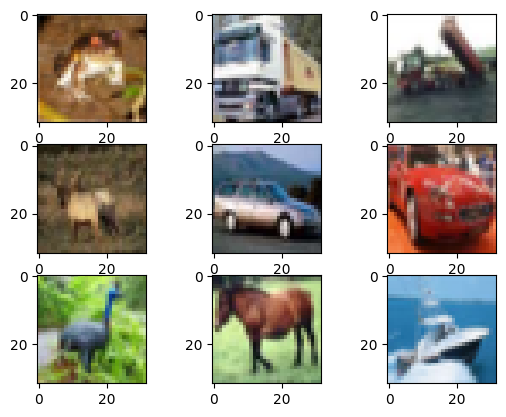

In [41]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

1.4. Print the first 5 labels

In [42]:
print("First 5 labels:", y_train[:5])

First 5 labels: [[6]
 [9]
 [9]
 [4]
 [1]]


1.5. One hot encoding the labels (Not necessary as we use Sparse Categorical Entropy)

In [43]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

1.6. Normalize the data

In [44]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0
print(x_train_normalized.min(), x_train_normalized.max())

0.0 1.0


1.7. Data augmentation: starting with a small rotation range between the standard so the images don't get distorted

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

**2. Model Architecture**

Design a CNN architecture suitable for image classification.
Include convolutional layers, pooling layers, and fully connected layers.

Research:
a) Luis: models and loss functions
b) Ewa: activation functions and optimizers
c) Marina: amount layers and metrics


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from keras.backend import clear_session
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# F1-score metric
def f1_score(y_true, y_pred):
    def f1_func(y_true, y_pred):
        precision = tf.keras.metrics.Precision()(y_true, y_pred)
        recall = tf.keras.metrics.Recall()(y_true, y_pred)
        f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
        return f1

    return tf.py_function(f1_func, (y_true, y_pred), tf.float32)


# Model / data parameters
input_shape=(32, 32, 3)
num_classes = 10


clear_session()

# Define the VGG model
    
model = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.3),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(num_classes, activation='softmax')
    ]
)


# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                        

In [47]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import backend as K


# Define the learning rate schedule function
def scheduler(epoch, lr):
    # Reduce learning rate by 10% every 10 epochs
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.9
    return lr


# Create the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Compile the model

optimizer = Adam

model.compile(optimizer=Adam(learning_rate=0.0001),  # Initial learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), f1_score])

# Train the model
history = model.fit(x_train, y_train, batch_size=256, epochs=50, callbacks=[lr_scheduler])



Epoch 1/50
196/196 [==============================] - 8s 26ms/step - loss: 5.4881 - accuracy: 0.2596 - precision: 0.3613 - recall: 0.0899 - f1_score: 0.1437 - lr: 1.0000e-04
Epoch 2/50
196/196 [==============================] - 5s 28ms/step - loss: 4.5864 - accuracy: 0.3861 - precision: 0.5473 - recall: 0.1705 - f1_score: 0.2597 - lr: 1.0000e-04
Epoch 3/50
196/196 [==============================] - 5s 27ms/step - loss: 4.0162 - accuracy: 0.4420 - precision: 0.6174 - recall: 0.2284 - f1_score: 0.3332 - lr: 1.0000e-04
Epoch 4/50
196/196 [==============================] - 5s 25ms/step - loss: 3.5375 - accuracy: 0.4856 - precision: 0.6570 - recall: 0.2800 - f1_score: 0.3920 - lr: 1.0000e-04
Epoch 5/50
196/196 [==============================] - 5s 26ms/step - loss: 3.1287 - accuracy: 0.5178 - precision: 0.6904 - recall: 0.3268 - f1_score: 0.4431 - lr: 1.0000e-04
Epoch 6/50
196/196 [==============================] - 5s 27ms/step - loss: 2.7973 - accuracy: 0.5426 - precision: 0.7050 - recall:

1563/1563 [==============================] - 38s 24ms/step - loss: 0.6360 - accuracy: 0.8245 - precision: 0.9041 - recall: 0.7315 - f1_score: 0.8071
Train loss: 0.6360201835632324
Train accuracy: 0.8245000243186951
Train precision: 0.904063880443573
Train recall: 0.7314599752426147
Train F1-score: 0.8070929050445557
313/313 [==============================] - 8s 24ms/step - loss: 0.8442 - accuracy: 0.7415 - precision: 0.8299 - recall: 0.6517 - f1_score: 0.7281
Test loss: 0.8441640734672546
Test accuracy: 0.7415000200271606
Test precision: 0.8298739194869995
Test recall: 0.6517000198364258
Test F1-score: 0.7281082272529602


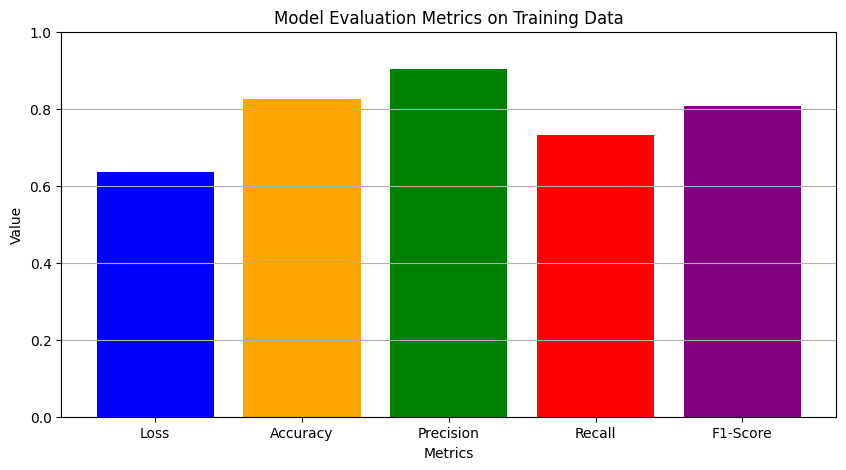

Training Data Metrics:


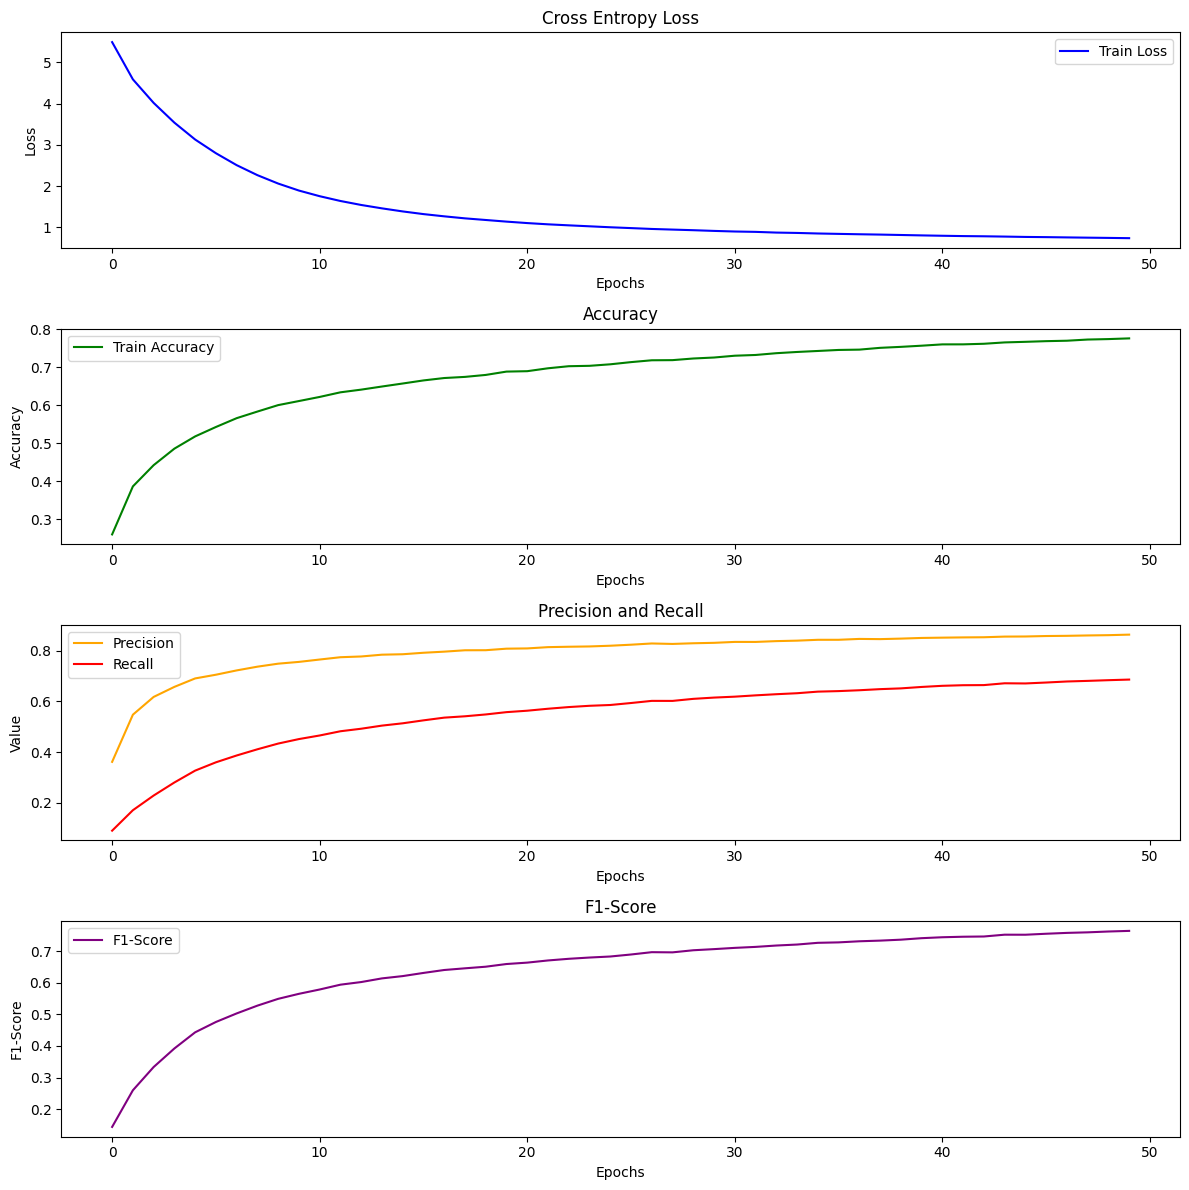

Test Data Metrics:


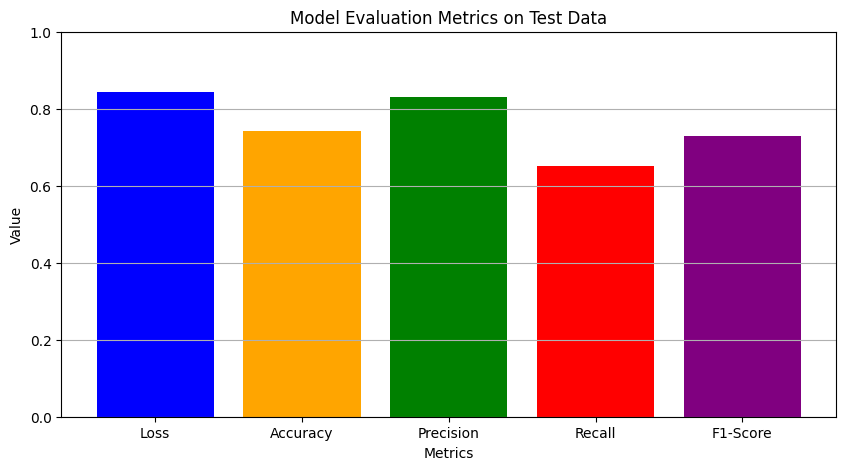

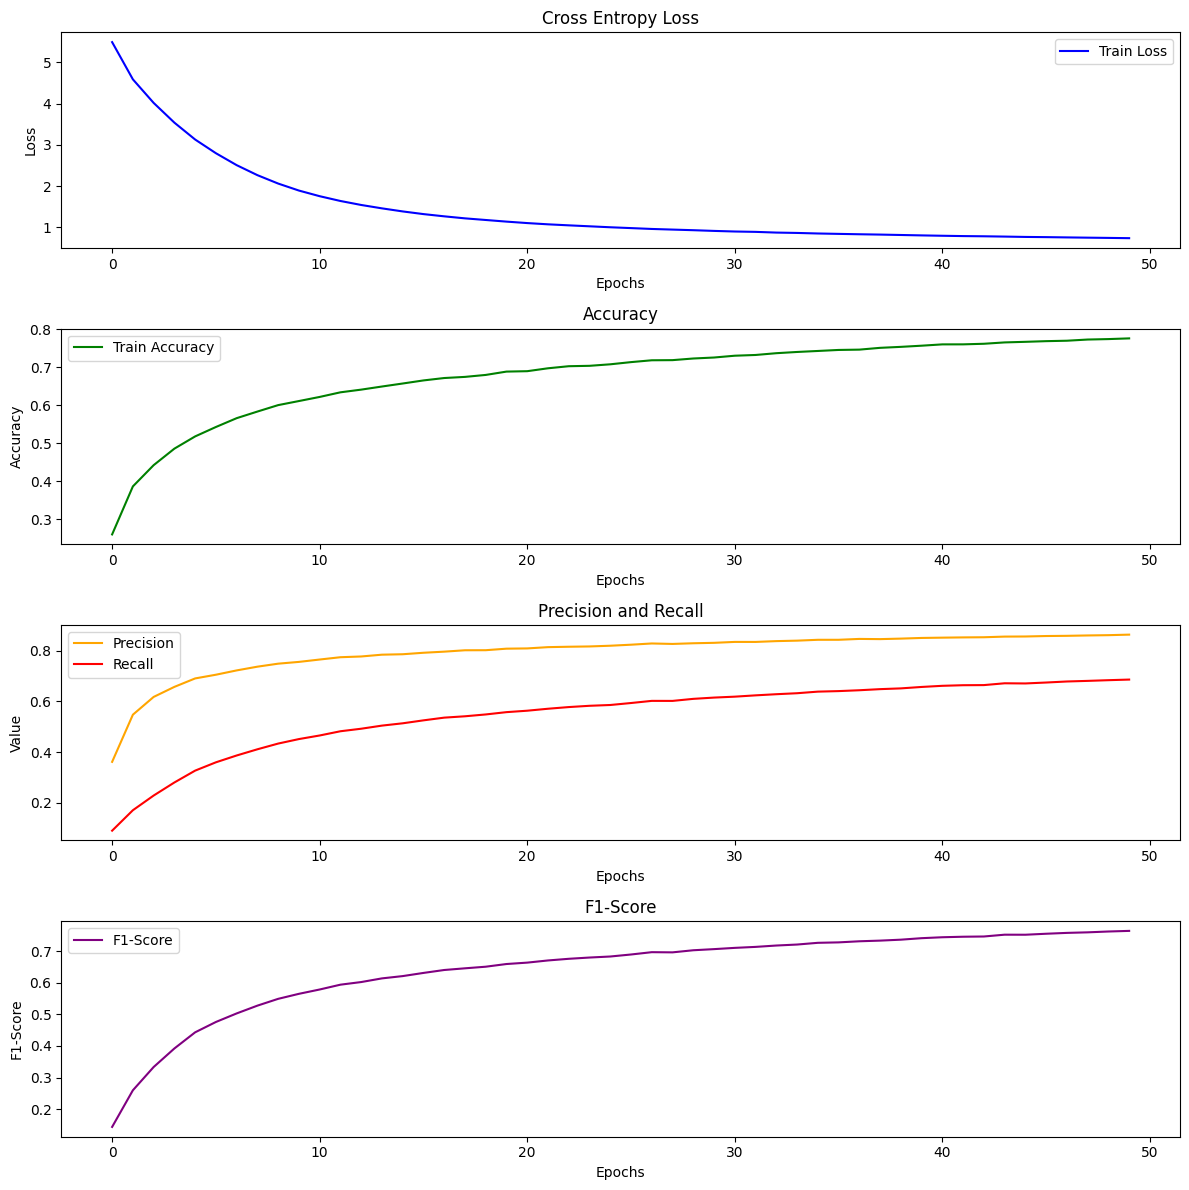

In [48]:
train_loss, train_acc, train_precision, train_recall, train_f1 = model.evaluate(x_train, y_train)

print('Train loss:', train_loss)
print('Train accuracy:', train_acc)
print('Train precision:', train_precision)
print('Train recall:', train_recall)
print('Train F1-score:', train_f1)

test_loss, test_acc, test_precision, test_recall, test_f1 = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)
print('Test F1-score:', test_f1)

import matplotlib.pyplot as plt

# Bar Plot for Training Data Metrics
train_metrics = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
train_values = [train_loss, train_acc, train_precision, train_recall, train_f1]

plt.figure(figsize=(10, 5))
plt.bar(train_metrics, train_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visibility
plt.title('Model Evaluation Metrics on Training Data')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.grid(axis='y')
plt.show()

# Subplots for Training History Metrics
plt.figure(figsize=(12, 12))  # Adjust the figure size

# Cross Entropy Loss
plt.subplot(411)  # First subplot (Cross Entropy Loss)
plt.plot(history.history['loss'], color='blue', label='Train Loss')
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Accuracy
plt.subplot(412)  # Second subplot (Accuracy)
plt.plot(history.history['accuracy'], color='green', label='Train Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Precision and Recall
plt.subplot(413)  # Third subplot (Precision)
plt.plot(history.history['precision'], color='orange', label='Precision')
plt.plot(history.history['recall'], color='red', label='Recall')
plt.title('Precision and Recall')
plt.ylabel('Value')
plt.xlabel('Epochs')
plt.legend()

# F1 Score
plt.subplot(414)  # Fourth subplot (F1 Score)
plt.plot(history.history['f1_score'], color='purple', label='F1-Score')
plt.title('F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()  # Avoids overlap between subplots
print("Training Data Metrics:")
plt.show()


metrics = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_loss, test_acc, test_precision, test_recall, test_f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visibility
plt.title('Model Evaluation Metrics on Test Data')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.grid(axis='y')
print("Test Data Metrics:")

plt.show()

# Subplots for Training History Metrics
plt.figure(figsize=(12, 12))  # Adjust the figure size

# Cross Entropy Loss
plt.subplot(411)  # First subplot (Cross Entropy Loss)
plt.plot(history.history['loss'], color='blue', label='Train Loss')
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Accuracy
plt.subplot(412)  # Second subplot (Accuracy)
plt.plot(history.history['accuracy'], color='green', label='Train Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Precision and Recall
plt.subplot(413)  # Third subplot (Precision)
plt.plot(history.history['precision'], color='orange', label='Precision')
plt.plot(history.history['recall'], color='red', label='Recall')
plt.title('Precision and Recall')
plt.ylabel('Value')
plt.xlabel('Epochs')
plt.legend()

# F1 Score
plt.subplot(414)  # Fourth subplot (F1 Score)
plt.plot(history.history['f1_score'], color='purple', label='F1-Score')
plt.title('F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()  # Avoids overlap between subplots
plt.show()




In [49]:
# Evaluate the model on the training data
train_results = model.evaluate(x_train, y_train, verbose=0)
print(f'Training Loss: {train_results[0]}')
print(f'Training Accuracy: {train_results[1]}')
print(f'Train Precision: {train_precision}')
print(f'Train Recall: {train_recall}')
print(f'Train F1-score: {train_f1}')


# Evaluate the model on the test data
test_results = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_results[0]}')
print(f'Test Accuracy: {test_results[1]}')
print(f'Test precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1-score: {test_f1}')

Training Loss: 0.6360201835632324
Training Accuracy: 0.8245000243186951
Train Precision: 0.904063880443573
Train Recall: 0.7314599752426147
Train F1-score: 0.8070929050445557
Test Loss: 0.8441640734672546
Test Accuracy: 0.7415000200271606
Test precision: 0.8298739194869995
Test Recall: 0.6517000198364258
Test F1-score: 0.7281082272529602


313/313 [==============================] - 1s 2ms/step


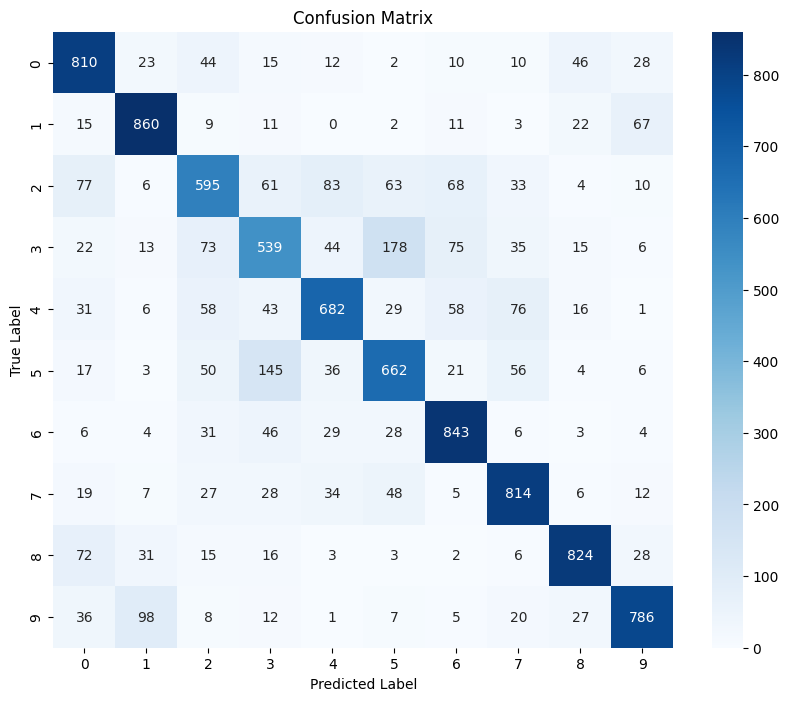

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()